![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [1]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 1.13.1


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [6]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

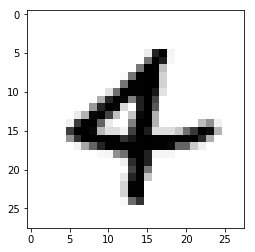

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[150],cmap='binary')
plt.show()

### Display Labels

In [10]:
y_train[150]

4

In [11]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [13]:
from tensorflow.keras.utils import to_categorical
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

### Validated Shapes

In [14]:
print("ytrain:",y_train_en.shape)
print("ytest:",y_test_en.shape)

ytrain: (60000, 10)
ytest: (10000, 10)


### Display Encoded Labels

In [15]:
y_train_en[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [23]:
import numpy as np
X_train_en=np.reshape(X_train,(60000,784))
X_test_en = np.reshape(X_test,(10000,784))
print("shape Xtrain" ,X_train_en.shape)
print("shape Xtest" ,X_test_en.shape)

shape Xtrain (60000, 784)
shape Xtest (10000, 784)


### Display Pixel Values

In [25]:
print(set(X_test_en[0]))

{0, 129, 1, 3, 133, 5, 9, 140, 14, 17, 18, 19, 21, 22, 151, 159, 31, 163, 36, 35, 166, 38, 40, 170, 44, 52, 182, 185, 58, 59, 60, 187, 62, 57, 61, 66, 67, 198, 72, 75, 203, 205, 77, 207, 209, 83, 84, 219, 221, 222, 224, 225, 121, 227, 126, 229, 233, 106, 236, 238, 240, 241, 114, 115, 242, 248, 249, 250, 251, 253, 254, 255}


### Data Normalization

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_norm = sc.fit_transform(X_train_en)
X_test_norm = sc.transform(X_test_en)

/home/rhyme/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rhyme/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rhyme/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Display Normalized Pixel Values

In [29]:
X_train_norm[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

# Task 6: Creating a Model
### Creating the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation ="relu", input_shape=(784,)),
    Dense(128,activation ="relu"),
    Dense(10,activation="softmax") 
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [33]:
model.compile(optimizer ="sgd",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [35]:
model.fit(X_train_norm,y_train_en, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4514 - acc: 0.8737
Epoch 2/3
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2005 - acc: 0.9406
Epoch 3/3
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1511 - acc: 0.9551


### Evaluating the Model

In [36]:
loss,accuracy=model.evaluate(X_test_norm,y_test_en)

10000/10000 [==============================] - 2s 151us/sample - loss: 0.1637 - acc: 0.9544


# Task 8: Predictions

### Predictions on Test Set

In [37]:
preds = model.predict(X_test_norm)
print("shape of prediction:",preds.shape)

shape of prediction: (10000, 10)


### Plotting the Results

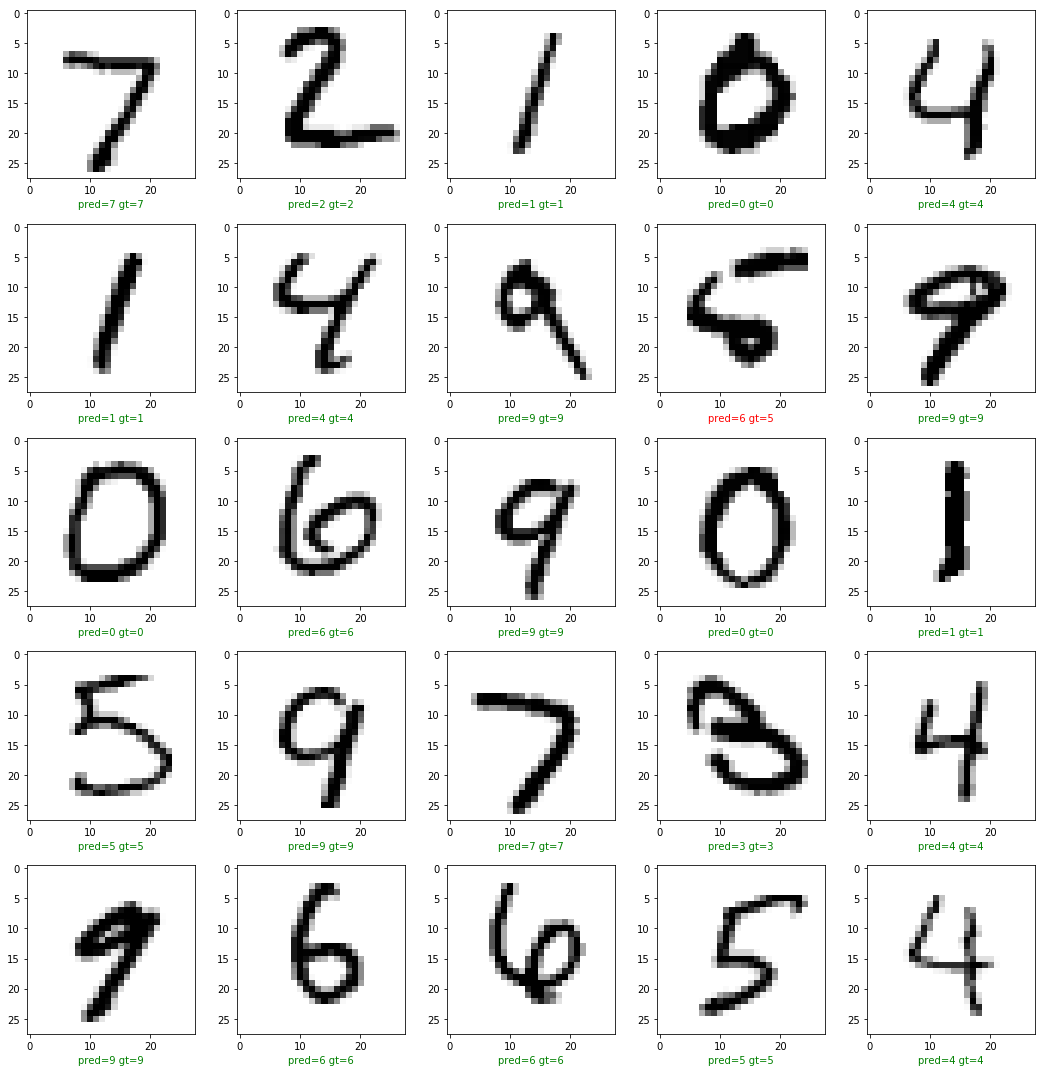

In [41]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    pred=np.argmax(preds[i])
    gt=y_test[i]
    col='g'
    if pred !=gt:
        col="r"
    plt.xlabel("pred={} gt={}".format(pred,gt),color=col)
    plt.imshow(X_test[i],cmap="binary")
    plt.tight_layout()
plt.show()